# Taller de Modelación
### Examen 2

Integrantes:

In [116]:
import numpy as nu
import matplotlib.pyplot as plt
import math as m
import statistics as st

### Actividad 2

Para esta actividad, nos apoyamos de 4 funciones. 

La primera nos simula la caminata que se describe con las ecuaciones:

$$
\begin{align}
X_{t+1} &= X_t + \text{sgn} (W) |W|^{-\mu}\\
Y_{t+1} &= Y_t + \text{sgn} (Z) |Z|^{-\mu}
\end{align}
$$


La segunda nos calcula los desplazamientos $||\Delta \vec{R}_t|| = ||\vec{R}_{t+1} -\vec{R}_{t}||$ 


La tercera nos calcula el desplazamiento cuadrático medio: $$\text{MSD}(t) = \frac{1}{N} \sum_{i=1}^{N}|\vec{R}^{(i)}(t) - \vec{R}^{(i)}(0)||^{2}$$ Donde $N$ es el número de realizaciones,  $\vec{R}^{(i)}(0) = \vec{R}_{0}^{(i)}$ es la posición inicial en la i-ésima realización y $\vec{R}^{(i)}(t)$ es la posición en el tiempo t en la i-ésima realización.


La cuarta funcion nos calcula la mediana cuadrática media dada por $$\text{MAD}(t) = M_e(||\vec{R}_{t} -\vec{R}_{0}||^2)$$


In [117]:
# Función que modela la realización de un proceso
# Acepta como parámetros:
# N como tiempo total de la simulación
# m el exponente mu de la primer función
def estocasticEq(N, m):
    R = nu.zeros((N,2))
    for t in range(0, N-1):
        W = nu.random.uniform(-1,1)
        Z = nu.random.uniform(-1,1)
        R[t+1] = [R[t][0] + nu.sign(W)*(abs(W)**(-m)),R[t][1] + nu.sign(Z)*(abs(Z)**(-m))]
    return R

In [118]:
# función que nos genera los desplaamientos 
# basados en la realización de un proceso
# Toma los mismos parametros que la primer función
def Displacements(N,m):
    vecDisplacements = nu.zeros(N-1)
    Walk = estocasticEq(N,m)
    for t in range(0,N-1):
        vecDisplacements[t] = nu.linalg.norm(Walk[t+1]-Walk[t])
    return vecDisplacements

In [119]:
# Función que nos genera el
# dezplazamiento cuadrático medio
# para cada tiempo t

# Acepta como parámetros:
# La función estocasticEq
# N como tiempo total para cada realización
# m el exponente para la primer función
# Número de realizaciones como Walks

def MSD(Eseqfun, N, m, Walks):
    vecMSD= nu.zeros(N)
    for i in range(Walks):
        Walk = estocasticEq(N,m)
        vecMSD += nu.array([(nu.linalg.norm(t))**2 for t in Walk])
    vecMSD/= Walks
    return vecMSD

        

In [120]:
# Función que nos calcula la 
# mediana cuadrática media
# Acepta los mismos parámetros que 
# la tercera función

def MAD(EseqFun, N, m, Walks):
    MADWalks = nu.zeros(N)
    WalksData = nu.array([estocasticEq(N,m) for i in range(Walks)])
    SquaredNorms = nu.zeros((N, Walks))
    for t in range(N):
        SquaredNorms[t] = [nu.linalg.norm(x)**2 for x in WalksData[:, t]]
    MADWalks = [st.median(x) for  x in SquaredNorms]
    return MADWalks
    
    

A continuación mostramos las 3 figuras de nuestro interes para $\mu = \frac{1}{4}$

Primero mostramos una realización del proceso para $t \in \{0,...,2000\}$. Aquí vemos como nuestro objeto se mueve en el plano con dicha $\mu$. Podemos ver que no hay alguna dirección por la cual preferimos movernos.

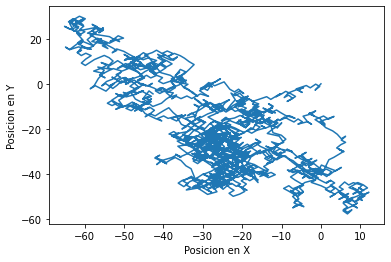

In [121]:
Walk = estocasticEq(2001,1/4)
plt.xlabel("Posicion en X")
plt.ylabel("Posicion en Y")
plt.plot(Walk[:,0], Walk[:,1])
plt.show()

Aqui mostramos el histogrma de la probabilidad de que el caminante se desplaze dicha distancia para $t \in \{0,...,10000\}$. Notamos que no varía mucha la velocidad del caminante

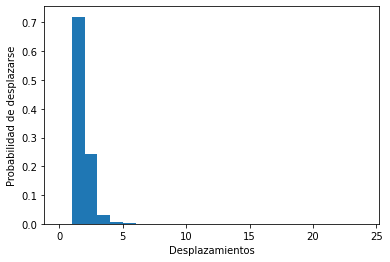

In [122]:
Displacement = Displacements(10001,1/4)
plt.hist(Displacement, density = True, bins = [i for i in range(0,25)])
plt.xlabel("Desplazamientos")
plt.ylabel("Probabilidad de desplazarse")
plt.show()

Aqui mostramos la gráfica del desplazamiento cuadrático medio contra el tiempo para $t \in \{0,...,2000\}$, haciendo 1000 realizaciones del proceso

[0.00000000e+00 4.02433211e+00 8.24498635e+00 ... 7.56016783e+03
 7.56730608e+03 7.58182063e+03]


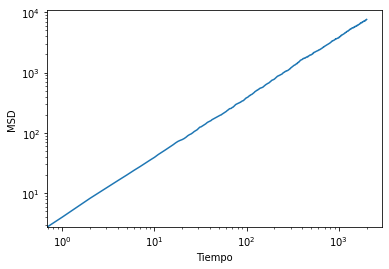

In [123]:
tsteps = 2001
MSDWalks = MSD(estocasticEq, tsteps, 1/4, 1000)
print(MSDWalks)
plt.plot(nu.linspace(0,tsteps,tsteps,endpoint=False),MSDWalks)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Tiempo")
plt.ylabel("MSD")
plt.show()

Las siguientes 3 figuras corresponden al parámetro $\mu = \frac{3}{4}$

Aquí vemos una realización del proceso para $t \in \{0,...,2000\}$. Podemos ver que  hay una instancia donde el movimiento es unidireccional. 

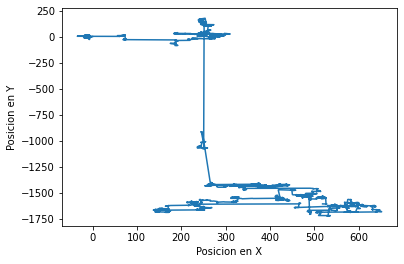

In [130]:
Walk2 = estocasticEq(2001,3/4)
plt.xlabel("Posicion en X")
plt.ylabel("Posicion en Y")
plt.plot(Walk2[:,0], Walk2[:,1])
plt.show()

Aquí vemos el histograma de la probabilidad a desplazarnos cierta distancia con $t \in \{0,...,10000\}$. Podemos ver que la velocidad del caminante varía más que para $\mu = \frac{1}{4}$

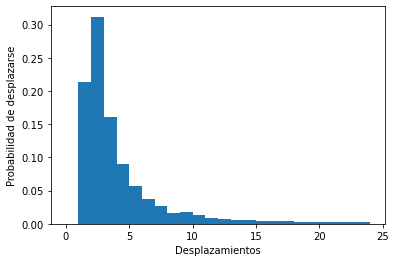

In [125]:
Displacement2 = Displacements(10001,3/4)
plt.hist(Displacement2, density = True, bins = [i for i in range(0,25)])
plt.xlabel("Desplazamientos")
plt.ylabel("Probabilidad de desplazarse")
plt.show()

Aqui mostramos la gráfica del desplazamiento cuadrático medio para 1000 realizaciones. Podemos ver que el MSD no converge, que justo concuerda con el hecho de no converger para $\mu > frac{1}{2}

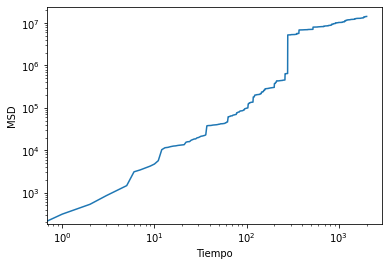

In [126]:
tsteps = 2001
MSDWalks2 = MSD(estocasticEq, tsteps, 3/4, 1000)
plt.plot(nu.linspace(0,tsteps,tsteps,endpoint=False),MSDWalks2)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Tiempo")
plt.ylabel("MSD")
plt.show()

Finalmente comparamos el exponente $\gamma$ para clasificar nuestra caminata.

Para $\mu = \frac{1}{4}$ usamos el MSD. Habiamos visto que la parametrización del movimiento, no tenía preferencia por alguna dirección, y parecía que el movimiento es completamente aleatorio. En clase vimos que el valor de$\gamma$ hablaba de como se comportaba el movimiento $\gamma = 1$ representaba un movimiento completamente aleatorio, por lo que parece ser que este movimiento tendrá dicha $\gamma$, o sino una $\gamma$ que se aproxime a 1

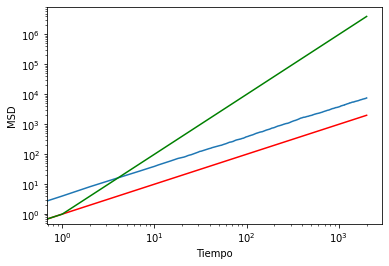

In [127]:
tsteps = 2001
plt.plot(nu.linspace(0,tsteps,tsteps,endpoint=False),MSDWalks)
plt.plot(nu.linspace(0,tsteps,tsteps,endpoint=False),nu.power(nu.linspace(0,tsteps,tsteps,endpoint=False),1),color='red')
plt.plot(nu.linspace(0,tsteps,tsteps,endpoint=False),nu.power(nu.linspace(0,tsteps,tsteps,endpoint=False),2),color='green')
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Tiempo")
plt.ylabel("MSD")
plt.show()

En efeto, vemos que las rectas rojas y azules en log-log parecen ser paralelas, donde la roja tiene exponente $\gamma = 1$ y la azul es el MSD, por lo que nuestro movimiento es difusivo.  Esto concuerda con lo que vimos en la parametrización de nuestro movimiento con $\mu = 1/4$. 

Para $\mu = \frac{3}{4}$ usamos el MAD. Habíamos observado que había una instancias en donde nuestro movimiento parecía tener preferencia por cierta dirección. En clase vimos que $\gamma \in (1,2)$ nos hablaba de movimientos que tenián preferencia de moverse largas distancias en la misma dirección. Con base a nuesto movimiento, podemos asumir antes de comparar que $\gamma$ justo está en dicho intervalo

In [128]:
tsteps = 2001
MADWalks = MAD(estocasticEq, tsteps, 3/4,1000)

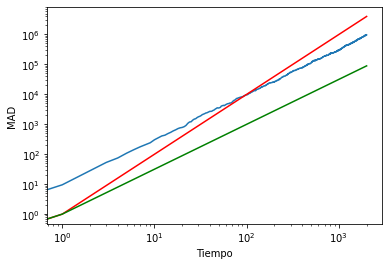

In [129]:
plt.plot(nu.linspace(0,tsteps,tsteps,endpoint=False),MADWalks)
plt.plot(nu.linspace(0,tsteps,tsteps,endpoint=False),nu.power(nu.linspace(0,tsteps,tsteps,endpoint=False),2),color='red')
plt.plot(nu.linspace(0,tsteps,tsteps,endpoint=False),nu.power(nu.linspace(0,tsteps,tsteps,endpoint=False),1.50),color='green')
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Tiempo")
plt.ylabel("MAD")
plt.show()

Podemos ver que las rectas verde y azul log-log parecen ser  paralelas, donde la azul es el MAD, y la verde tiene exponente 1.5. Este movimiento es superdifusivo y la interpretación de esta $\gamma$ justo concuerda con lo que vimos en nuestra parametrización.

# Problema 3

### a)

Para calcular la matriz de transición enumeramos los estados.

1: AA x AA

2: AA x Aa

3: Aa x Aa

4: Aa x aa

5: AA x aa

6: aa x aa

Para cada estado tenemos las siguientes posibilidades de combinación.

1: AA, AA, AA, AA

2: AA, Aa, AA, Aa

3: AA, Aa, Aa, aa

4: Aa, Aa, aa, aa

5: Aa, Aa, Aa, Aa

6: aa, aa, aa, aa

Para cada estado, tenemos las siguientes probabilidades de que un cachorro arbitrario de la camada asociada a ese estado tenga cierto genotipo.

1: $p(AA) = 1$

2: $p(AA) = p(Aa) = 1/2$

3: $p(AA) = p(aa) = 1/4$, $p(Aa) = 1/2$

4: $p(Aa) = p(aa) = 1/2$

5: $p(Aa) = 1$

6: $p(aa) = 1$

Ahora asumimos que la población de machos tiene la misma distribución de genotipos que la población de hembras. Eligiengo un cachorro hembra y uno macho tenemos las siguientes probabilidades de transición.

$p_{i,1} = 
\begin{cases} 
    P(AA x AA) = P_M(AA)P_H(AA) = 1 & \text{si $i = 1$}\\
    0 & \text{si $i\in [6]-1$}
\end{cases}$

$p_{i,2} = 
\begin{cases}
    P(AA\ x\ AA) = P_M(AA)P_H(AA) = 1/4  & i = 1\\
    P(AA\ x\ Aa) = P_M(AA)P_H(Aa) + P_M(Aa)P_H(AA) = 1/2 & i = 2\\
    P(Aa\ x\ Aa) = P_M(Aa)P_H(Aa) = 1/4 & i = 3\\
    0 & i\in [6]-[3]
\end{cases}$

$p_{i,3} = 
\begin{cases}
    P(AA\ x\ AA) = P_M(AA)P_H(AA) = 1/16 & i = 1\\
    P(AA\ x\ Aa) = P_M(AA)P_H(Aa) + P_M(Aa)P_H(AA) = 1/4 & i = 2\\
    P(Aa\ x\ Aa) = P_M(Aa)P_H(Aa) = 1/4 & i = 3\\
    P(Aa\ x\ aa) = P_M(Aa)P_H(aa) + P_M(aa)P_H(Aa) = 1/4 & i = 4\\
    P(AA\ x\ aa) = P_M(AA)P_H(aa) + P_M(aa)P_H(AA) = 1/8 & i = 5\\
    P(aa\ x\ aa) = P_M(aa)P_H(aa) = 1/16 & i = 6\\
\end{cases}$

$p_{i,4} = 
\begin{cases}
    P(Aa\ x\ Aa) = P_M(Aa)P_H(Aa) = 1/4 & i = 3\\
    P(Aa\ x\ aa) = P_M(Aa)P_H(aa) + P_M(aa)P_H(Aa) = 1/2 & i = 4\\
    P(aa\ x\ aa) = P_M(aa)P_H(aa) = 1/4 & i = 6\\
    0 & i\in [6]-\{3,4,6\}
\end{cases}$

$p_{i,5} =
\begin{cases}
    P(Aa\ x\ Aa) = P_M(Aa)P_H(Aa) = 1 & i = 3\\
    0 & i\in [6]-\{3\}
\end{cases}$

$p_{i,6} =
\begin{cases}
    P(aa\ x\ aa) = P_M(aa)P_H(aa) = 1 & i = 6\\
    0 & i\in [5]
\end{cases}$

Por lo tanto, obtenemos la siguiente matriz de transición.

$M = 
\begin{bmatrix}
    1 & 1/4 & 1/16 & 0 & 0 & 0\\
    0 & 1/2 & 1/4 & 0 & 0 & 0\\
    0 & 1/4 & 1/4 & 1/4 & 1 & 0\\
    0 & 0 & 1/4 & 1/2 & 0 & 0\\
    0 & 0 & 1/8 & 0 & 0 & 0\\
    0 & 0 & 1/16 & 1/4 & 0 & 1
\end{bmatrix}$

Tenemos también la siguiente gráfica.

<img src = "GráficaAsociada.png" alt = "Gráfica" style = "width: 700px;" />

### b)

Ahora calcularemos los eigenvalores y eigenvectores de la matriz.

In [1]:
import numpy as np

M = np.array([
    [1,1/4,1/16,0,0,0],
    [0,1/2,1/4,0,0,0],
    [0,1/4,1/4,1/4,1,0],
    [0,0,1/4,1/2,0,0],
    [0,0,1/8,0,0,0],
    [0,0,1/16,1/4,0,1]
])

evalM = np.linalg.eig(M)[0]
evecM = np.linalg.eig(M)[1]

Los eigenvalores son los siguientes.

In [2]:
print(evalM)

[ 1.          1.          0.80901699 -0.30901699  0.25        0.5       ]


Sólo nos interesan los eigenvectores con eigenvalor 1, pues con ellos obtendremos las distribuciones de equilibrio. Tenemos dos de ellos que son linealmente independientes, son los siguientes.

In [3]:
evecM1 = evecM[:,0]
evecM2 = evecM[:,1]

print(evecM1)
print(evecM2)

[1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1.]


Como las entradas de los eigenvectores suman 1 sabemos que forman una distribución de probabilidad. Como estas distribuciones son eigenvectores con eigenvalor 1 sabemos que son las distribuciones de equilibrio de la matriz $M$.

Esto es de esperarse ya que en la gráfica de la cadena podemos observar que si estamos en el estado AA x AA entonces no podemos pasar a ningún otro estado, y ocurre lo mismo con el estado aa x aa. Es por esto que las distribuciones de equilibrio son $(1,0,0,0,0,0)$, correspondiente al estado AA x AA que es el estado 1, y $(0,0,0,0,0,1)$, correspondiente al estado aa x aa que es el estado 6.

In [8]:
def InitDist(v):
    
    u = np.random.uniform()
    i = 0
    cdf=v[0]
    
    while u>cdf:
        i +=1
        cdf+=v[i]
    
    return i

def Markov_1(P,p0,n):
    
    States = [InitDist(p0)]
    
    for i in range(1,n):
        States.append(InitDist(P[:,States[i-1]]))
    
    return States

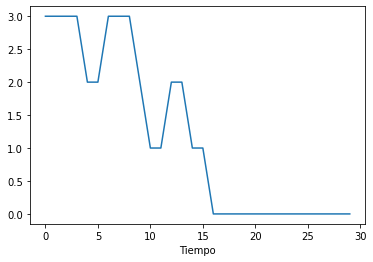

In [22]:
import matplotlib.pyplot as plt

P0_1  = np.random.random(6)
P0_1 /= P0_1.sum()
C1 = Markov_1(M,P0_1,30)

plt.xlabel("Tiempo")
plt.plot(range(len(C1)),C1)
plt.show()